## 0. 패키지 로딩하기

In [1]:
from moviepy.editor import VideoClip, VideoFileClip
from moviepy.editor import ipython_display
from PIL            import Image

import os
import cv2
import numpy as np

## 1. 프로젝트 (1) moviepy로 비디오 처리하기

* 먼저 동영상을 쉽게 다룰 수 있는 방법을 찾고 있다.
* 그래서 대안으로 떠오른 것은 moviepy라는 파이썬 기반의 동영상 처리 라이브러리이다.
* 하지만 동영상을 다룰 때의 실행시간, 즉 처리 속도가 중요하다는 것도 알고 있다.
* 그래서 moviepy를 쓰는 것이 성능면에서 적합한지 알아보려고 한다.

### 1_1. moviepy를 이용해서 주피터 노트북 상에서 비디오를 읽고 쓰는 프로그램을 작성한다.
* 샘플로 제공된 video2.mp4를 moviepy로 읽어서 width = 640으로 축소하여 화면에 플레이해 보고, 플레이한 내용을 mvpyresult.mp4라는 파일로 저장해 보겠다.
* 저장이 완료되면 샘플 원본과 새롭게 저장된 동영상 파일을 열어서 두 영상의 화면크기나 파일 사이즈를 비교해 보자.

In [2]:
# 읽기
video_path = os.getenv("HOME") + "/aiffel/video_sticker_app/images/video2.mp4"
clip       = VideoFileClip(video_path)
clip       = clip.resize(width = 640)
clip.ipython_display(fps = 30, loop = True, autoplay = True, rd_kwargs = dict(logger = None))

# 쓰기
result_video_path = os.getenv("HOME") + "/aiffel/video_sticker_app/images/mvpyresult.mp4"
clip.write_videofile(result_video_path)

t:   0%|          | 0/404 [00:00<?, ?it/s, now=None]                

Moviepy - Building video /home/aiffel-dj52/aiffel/video_sticker_app/images/mvpyresult.mp4.
MoviePy - Writing audio in mvpyresultTEMP_MPY_wvf_snd.mp3
MoviePy - Done.
Moviepy - Writing video /home/aiffel-dj52/aiffel/video_sticker_app/images/mvpyresult.mp4



Moviepy - Done !
Moviepy - video ready /home/aiffel-dj52/aiffel/video_sticker_app/images/mvpyresult.mp4


In [3]:
# 읽기 (resize)
video_path = os.getenv("HOME") + "/aiffel/video_sticker_app/images/mvpyresult.mp4"
clip       = VideoFileClip(video_path)
clip.ipython_display(fps = 30, loop = True, autoplay = True, rd_kwargs = dict(logger = None))

In [4]:
image_path = os.getenv("HOME")
image_path

'/home/aiffel-dj52'

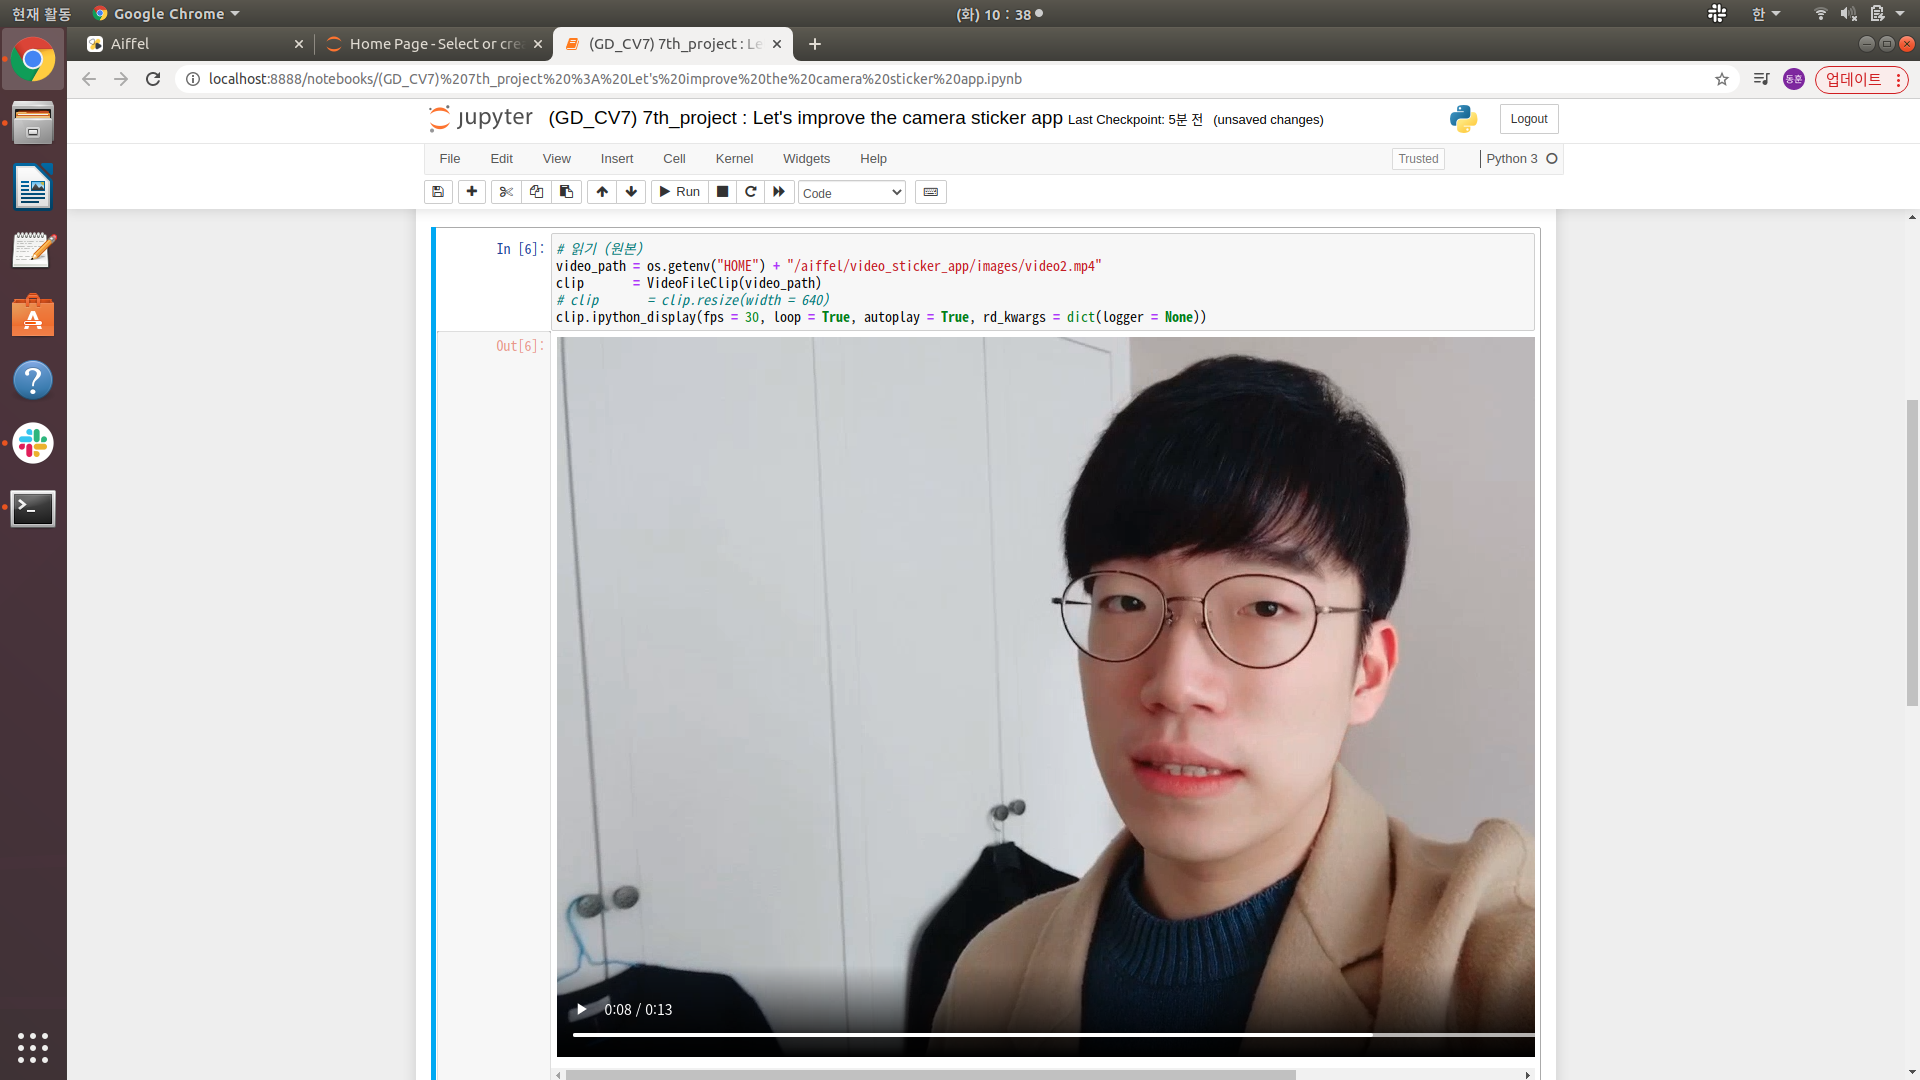

In [5]:
# 원본 영상
Image.open(image_path + "/Pictures/image.png")

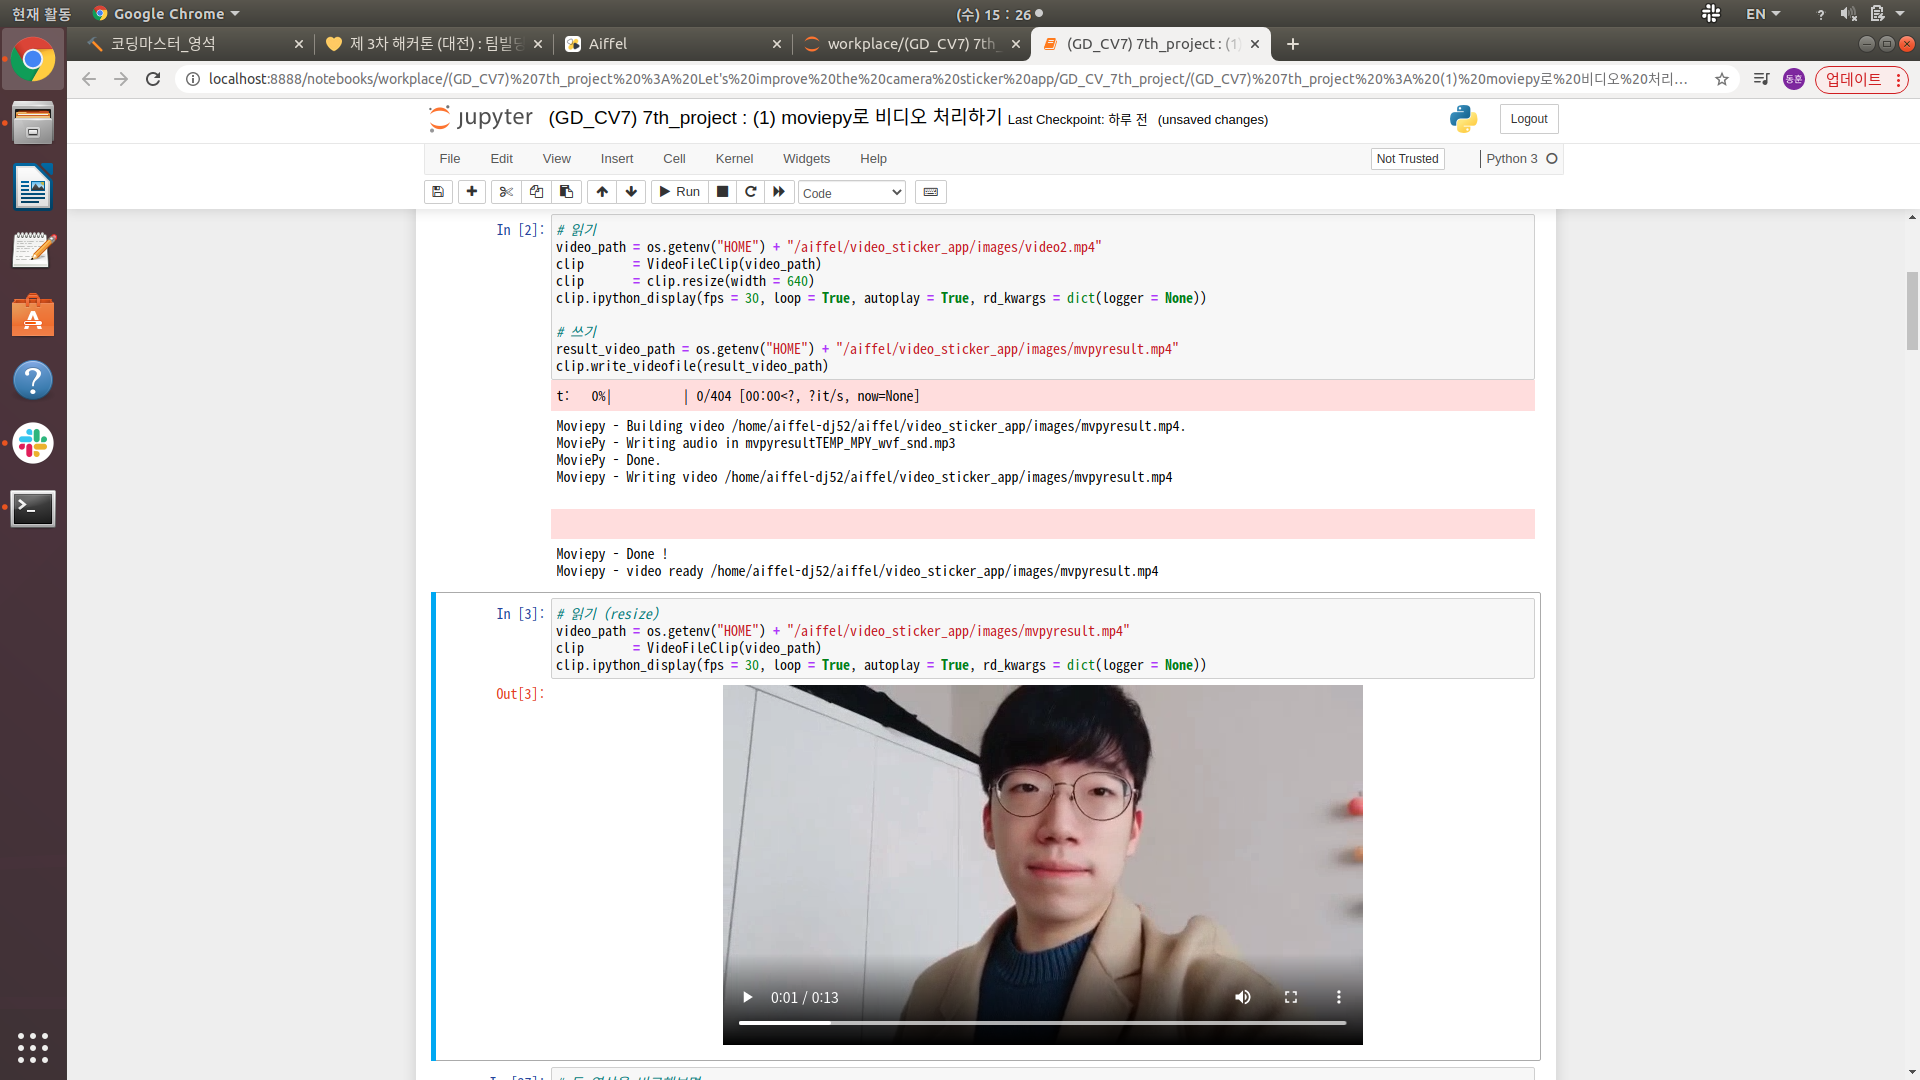

In [6]:
# resize 영상
Image.open(image_path + "/Pictures/image2.png")

In [7]:
# 두 영상을 비교해보면
# 원본의 영상 파일 크기는 10.7MB이고, 사이즈를 줄인 파일은 876.3KB로 크기가 확실히 많이 줄었다.
# 노트북에서는 코덱이 안 맞는다고 하여 주피터 노트북으로 실행해본 결과 두 영상의 차이는
# 원본은 화면이 어마하게 크게 나왔고, 사이즈를 줄인 동영상은 우리가 그래프를 그릴 때 처럼 적당한 크기로 나왔다.
# 둘의 화질 차이는 크게 느끼지 못했다. 오히려 그래서 원본 동영상은 크게 나오고 사이즈를 줄인 동영상은 한 눈에 들어오게 나와서 훨씬 보기 편했다.
# 원본 영상을 가진 상태로 주피터 노트북 파일을 저장하면 10MB이 넘어가서 캡쳐본으로만 어느정도 화면 크기인지 남긴다.

### 1_2. moviepy 로 읽은 동영상을 numpy 형태로 변환하고 영상 밝기를 50% 어둡게 만든 후에 저장한다.

In [8]:
# 읽기
video_path = os.getenv("HOME") + "/aiffel/video_sticker_app/images/video2.mp4"
clip       = VideoFileClip(video_path)
clip       = clip.resize(width = 640)
clip.ipython_display(fps = 30, loop = True, autoplay = True, rd_kwargs = dict(logger = None))

# clip 에서 numpy 로 데이터 추출
vlen            = int(clip.duration * clip.fps)
video_container = np.zeros((vlen, clip.size[1], clip.size[0], 3), dtype = np.uint8)

for i in range(vlen):
    img                = clip.get_frame(i / clip.fps)
    video_container[i] = (img * 0.5).astype(np.uint8)

# 새 clip 만들기
dur     = vlen / clip.fps
outclip = VideoClip(lambda t: video_container[int(round(t * clip.fps))], duration = dur)

# 쓰기
result_video_path2 = os.getenv("HOME") + "/aiffel/video_sticker_app/images/mvpyresult2.mp4"
outclip.write_videofile(result_video_path2, fps = 30)

t:  12%|█▏        | 48/403 [00:00<00:00, 472.96it/s, now=None]

Moviepy - Building video /home/aiffel-dj52/aiffel/video_sticker_app/images/mvpyresult2.mp4.
Moviepy - Writing video /home/aiffel-dj52/aiffel/video_sticker_app/images/mvpyresult2.mp4



Moviepy - Done !
Moviepy - video ready /home/aiffel-dj52/aiffel/video_sticker_app/images/mvpyresult2.mp4


In [9]:
# 읽기 (resize)
video_path = os.getenv("HOME") + "/aiffel/video_sticker_app/images/mvpyresult2.mp4"
clip       = VideoFileClip(video_path)
clip.ipython_display(fps = 30, loop = True, autoplay = True, rd_kwargs = dict(logger = None))

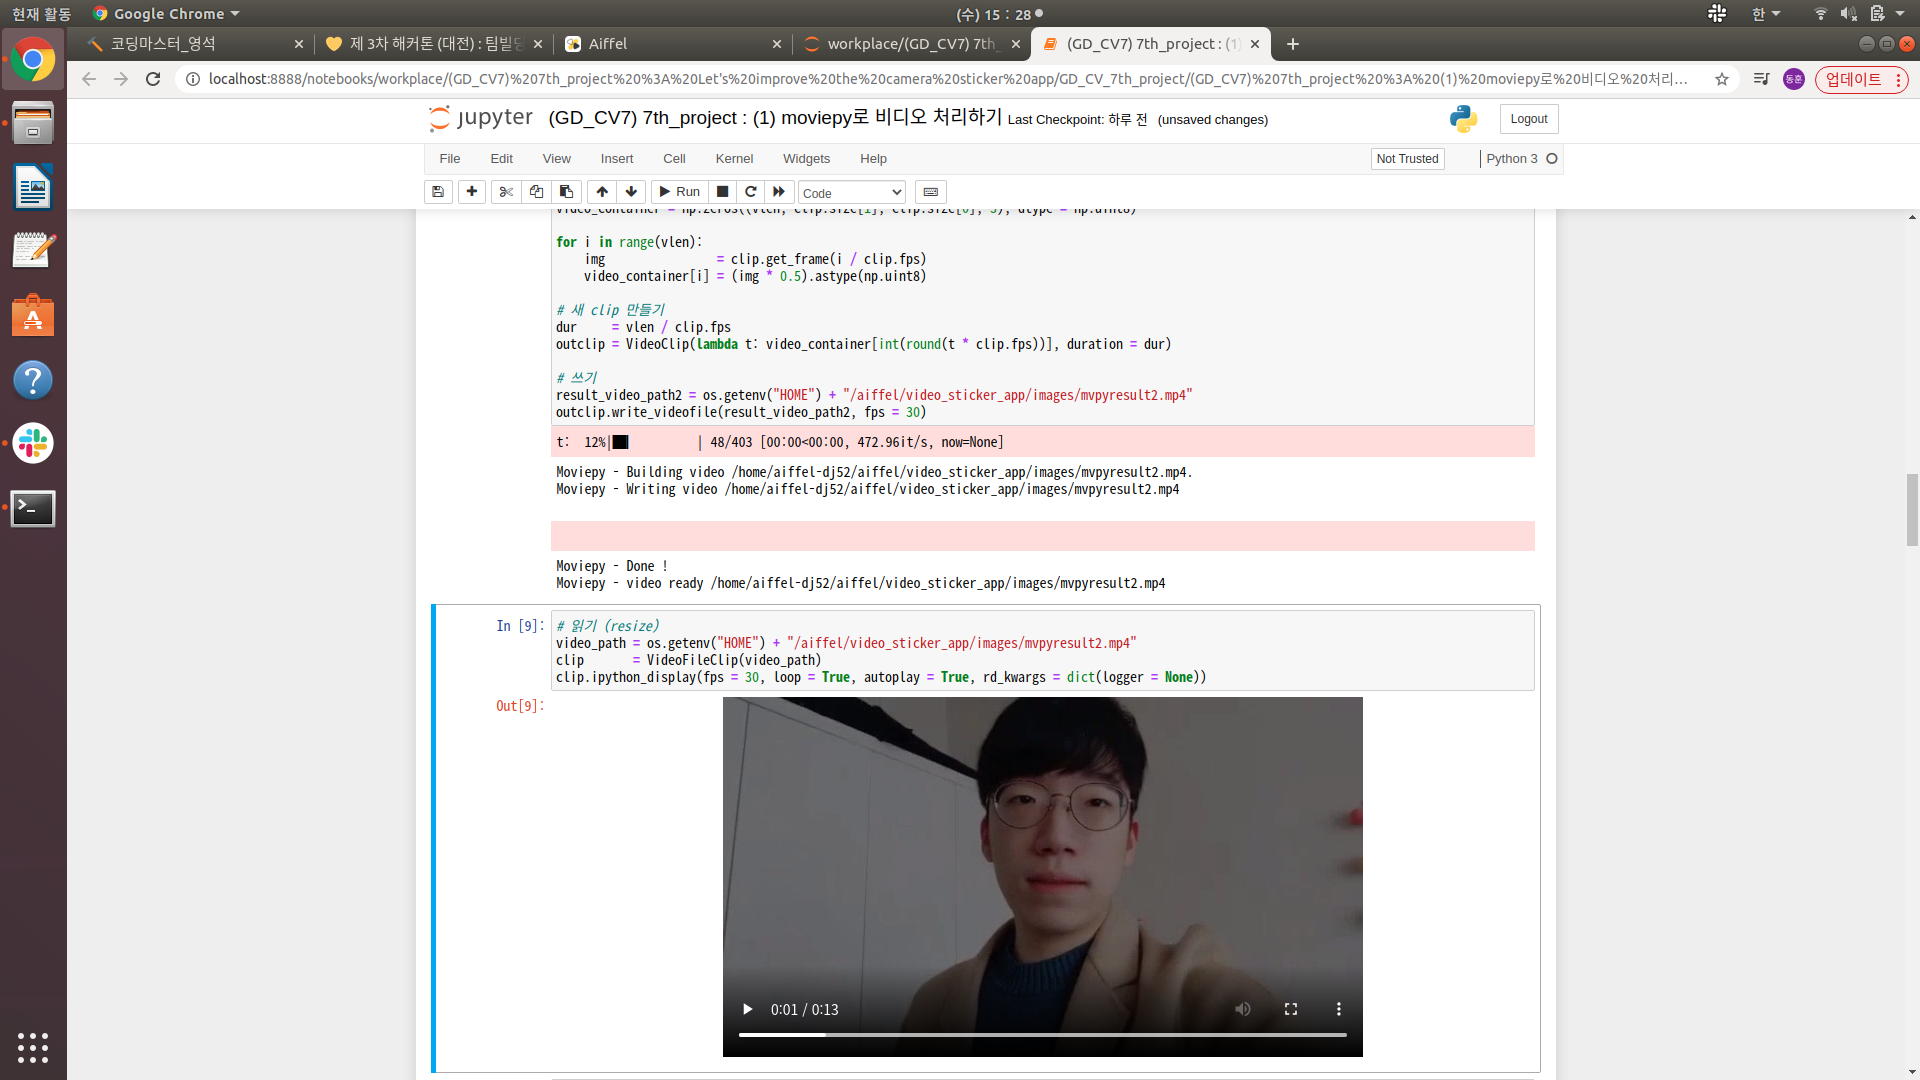

In [10]:
# 밝기를 조절한 영상
Image.open(image_path + "/Pictures/image3.png")

In [11]:
# 밝기를 50% 낮췄을 때 사이즈를 줄인 영상과의 차이점은 밝기 차이밖에 없었다. (당연한 결과인듯하다)

### 1_3. 영상을 읽고 쓰는 시간을 측정한다. OpenCV를 사용할 때와 차이를 측정한다.

In [15]:
# CASE 1 : moviepy 사용
start = cv2.getTickCount()
clip  = VideoFileClip(video_path)
clip  = clip.resize(width = 640)

vlen            = int(clip.duration * clip.fps)
video_container = np.zeros((vlen, clip.size[1], clip.size[0], 3), dtype = np.uint8)

for i in range(vlen):
    img                = clip.get_frame(i / clip.fps)
    video_container[i] = (img * 0.5).astype(np.uint8)

dur     = vlen / clip.fps
outclip = VideoClip(lambda t: video_container[int(round(t * clip.fps))], duration = dur)

mvpy_video_path = os.getenv("HOME") + "/aiffel/video_sticker_app/images/mvpyresult.mp4"
outclip.write_videofile(mvpy_video_path, fps = 30)

time = (cv2.getTickCount() - start) / cv2.getTickFrequency()
print (f"[INFO] moviepy time : {time:.2f}ms")

t:  13%|█▎        | 52/402 [00:00<00:00, 516.35it/s, now=None]

Moviepy - Building video /home/aiffel-dj52/aiffel/video_sticker_app/images/mvpyresult.mp4.
Moviepy - Writing video /home/aiffel-dj52/aiffel/video_sticker_app/images/mvpyresult.mp4



Moviepy - Done !
Moviepy - video ready /home/aiffel-dj52/aiffel/video_sticker_app/images/mvpyresult.mp4
[INFO] moviepy time : 1.56ms


In [17]:
# moviepy를 사용했을 경우 결리는 시간은 1.56ms이다.

In [19]:
# CASE 2 : OpenCV 사용
start = cv2.getTickCount()
vc    = cv2.VideoCapture(video_path)

cv_video_path = os.getenv("HOME") + "/aiffel/video_sticker_app/images/cvresult.mp4"
fourcc        = cv2.VideoWriter_fourcc(*"mp4v")
vw            = cv2.VideoWriter(cv_video_path, fourcc, 30, (640, 360))

vlen = int(vc.get(cv2.CAP_PROP_FRAME_COUNT))

for i in range(vlen):
    ret, img = vc.read()
    
    if ret == False: break
    
    img_result = cv2.resize(img, (640, 360)) * 0.5
    vw.write(img_result.astype(np.uint8))
    
time = (cv2.getTickCount() - start) / cv2.getTickFrequency()

print (f"[INFO] cv time : {time:.2f}ms")

[INFO] cv time : 0.95ms


In [21]:
# OpenCV를 사용했을 경우 걸리는 시간은 0.95ms이다.

### 1_4. moviepy 를 이용할 때의 장단점을 분석한다.

In [22]:
# 장점
# 1. 동영상의 크기를 줄이거나, 밝기를 조절하는 등 이펙트를 줄 수 있다. 동영상을 편집할 경우 유용할 듯 하다.
# 2. numpy와 호환이 되는 듯 하다. 따라서 동영상을 데이터로 읽어서 다른 변환을 줄 수 있을 듯 하다. 그래서 1번처럼 이펙트를 줄 수 있는 듯 하기도 하다.

# 단점
# 1. 속도가 OpenCV에 비해 느리다. 그래서 실시간으로 동영상을 틀 경우에는 moviepy보다는 OpenCV가 더 좋을 수 있을 것 같다.

## 프로젝트 (2) 어디까지 만들고 싶은지 정의하기

* 같은 폴더에 있는 newaddsticker.py와 webcam_sticker.py을 이용하여 진행했다.

### 2_1. 스티커앱을 실행하고 카메라를 고정하고 서서히 멀어져본다. 혹은 아주 가까이 다가와 본다. 얼굴을 찾지 못하는 거리를 기록해보자.

In [1]:
# 거리는 약 1m가 되니 스티커가 불안정하게 깜박거렸다.
# 또한 사람이 없다가 갑자기 옆에서 나타나는 경우 인식을 못하거나 프로그램이 꺼지는 현상을 발견했다.

### 2_2. 다시 자리로 돌아온 후 고개를 상하좌우로 움직여보자. yaw, pitch, roll 각도의 개념을 직접 실험해 보고 각각 몇 도까지 정상적으로 스티커앱이 동작하는지 기록해보자.

* yaw   : y축 기준 회전 → 높이 축
* picth : x축 기준 회전 → 좌우 축
* roll  : z축 기준 회전 → 거리 축

In [2]:
# 좌우로 움직였을 때는 왼쪽으로 고개를 돌릴 때는 스티커가 어느정도 붙는데, 오른쪽으로는 살짝만 움직여도 스티커가 붙지 않는다.
# 위 아래로 움직였을 경우 둘 다 잘 붙지 않는다.
# 왼쪽 위아래로 돌릴 경우 어느정도 붙는다.

# 본인의 헤어스타일은 오른쪽 가르마를 탄 S자 앞머리인데, 왼쪽으로 고개를 돌리면 카메라에서 이마가 보인다. 반대로 돌릴 시 머리카락이 이마를 덮는다.
# 카메라가 얼굴을 인식해서 왕관을 씌워줄 때 유독 왼쪽으로 돌면 스티커가 잘 붙는 이유는 이마가 보여서 이를 인식하고 좌표를 계산할 수 있지만,
# 오른쪽으로 돌 시 눈썹이 안보이고 바로 머리카락이 보여서 제대로 인식을 못 하는 것 같다.

### 2_3. 만들고 싶은 스티커앱의 스펙(허용 거리, 허용 인원 수, 허용 각도, 안정성)을 정해보자.

* 기준의 이유를 어떻게 정했는지가 중요하다. → 서비스 관점, 엔지니어링 관점으로 설명하면 좋다.

In [3]:
# 1. 거리 : 20cm ~ 1m
# 너무 가까우면 전체 얼굴이 카메라에 담아지지 않아서 스티커를 붙이는 이유가 없음.
# 핸드폰을 들고 내 얼굴을 찍는다고 생각해보면 20cm 정도가 최저 거리 일 거 같음.
# 또 너무 멀어도 소용 없음. 멀수록 얼굴 크기에 맞춰서 왕관의 크기가 작아질텐데, 그럼 사진을 찍을 때 내 머리에 노란색 이상한게 있는 듯한 느낌일 거 같음.

# 2. 인원 수 : 3명
# 이런 스티커를 이용해서 사진을 찍는다면 다수보다는 소수인 경우일 것 같음.
# 그럼 어느정도 얼굴 크기와 스티커 크기를 고려했을 때 일렬 또는 앞에 낮게 무릎을 굽혀서 사람이 카메라에 담긴다고 하면 3명이 적당할 것 같음.

# 3. 요즘은 마스크를 안 쓰는 사람이 없음.
# 혹시나 마스크를 쓰더라도 왕관을 씌울 수 있으면 좋을 것 같음.

## 프로젝트 (3) 스티커 Out Bound 예외처리 하기

* 이전 스텝에서 만든 기본 웹캠 스티커앱의 문제점들을 찾아서 보완해보자.

### 3_1. 지금까지 만든 스티커앱을 이용해서 예외 상황을 찾는다. 특히 서서히 영상에서 좌우 경계 밖으로 나가며 코드의 행동을 확인해보자.
* 웹캠을 이용해서 자유롭게 촬영하시면 된다. 발생하는 예외 상황을 꼼꼼하게 기재한다.

In [5]:
# 문제점
# 화면 양 옆 끝으로 가면 프로그램이 꺼지는 현상이 발생한다. 특히 왼쪽 끝은 민감하게 반응하는 듯 하다.
# 그리고 스티커가 없을 경우 오른쪽으로 가면 좀 관대한 듯 하다. 하지만 스티커가 있다면 민감해진다...

### 3_2. 문제가 어디에서 발생하는지 코드에서 확인한다.

* (힌트) 얼굴이 카메라 왼쪽 경계를 벗어나서 detection 되는 경우 refined_x 의 값이 음수가 된다.
* img_bgr[..., refined_x:...] 에서 numpy array의 음수 index에 접근하게 되므로 예외가 발생한다.

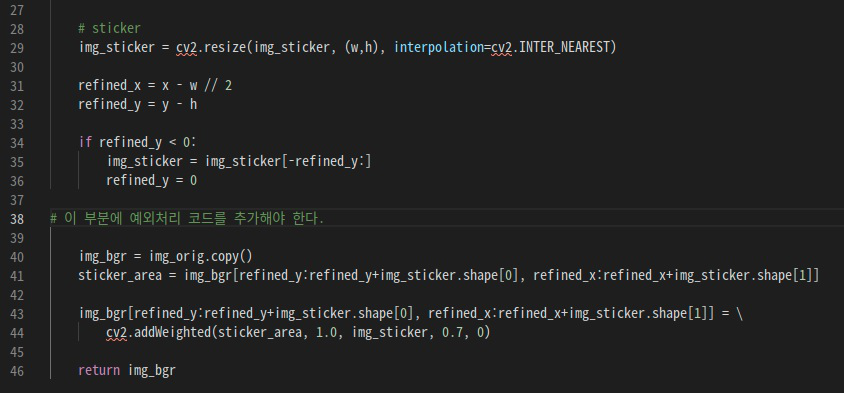

In [10]:
# newaddsticker.py의 img2sticker 메소드에서 아래 사진에서 38행에 x축에 대해서 예외처리 코드를 추가해야 한다.
Image.open(image_path + "/Pictures/img.jpg")

### 3_3. Out bound 오류(경계 밖으로 대상이 나가서 생기는 오류)를 해결한다.

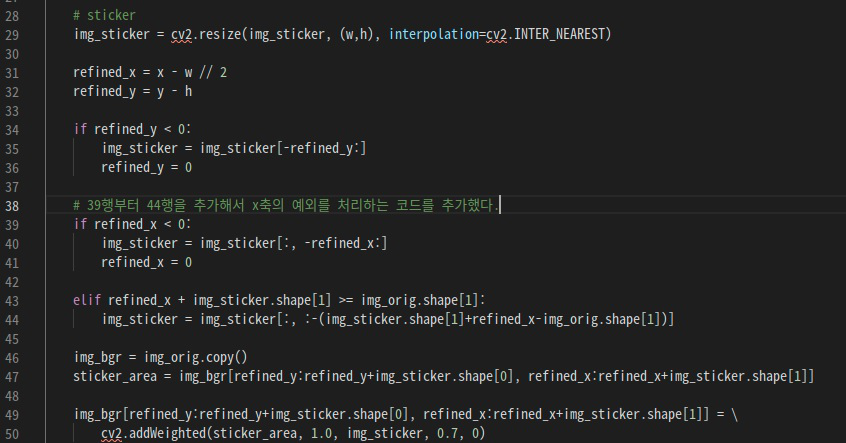

In [12]:
# 위 예외처리 코드 부분에 들어가야 하는 코드는 아래의 이미지에서 39행 ~ 44행의 코드이다.
Image.open(image_path + "/Pictures/img(1).jpg")

### 3_4. 다른 예외는 어떤 것들이 있는지 정의해보자. 어떤 것이 문제가 되는지 스스로 정해보자.

* 꼼꼼이 찾아보면 위에서 수정한 것과 같은 명백한 오류 발생 케이스 이외에도 다양한 예외 상황을 찾아볼 수 있을 것이다.
* 정확한 정답은 없다. 본인이 정의하기 나름이다.

## 프로젝트 (4) 스티커앱 분석 - 거리, 인원 수, 각도, 시계열 안정성

### 4_1.  멀어지는 경우에 왜 스티커앱이 동작하지 않는지 분석해보자.
* detection, landmark, blending 단계 중 무엇이 문제일까?
* dlib detection이 문제이다.
* 멀어지면 detector_hog 단계에서 bbox가 출력되지 않는다.

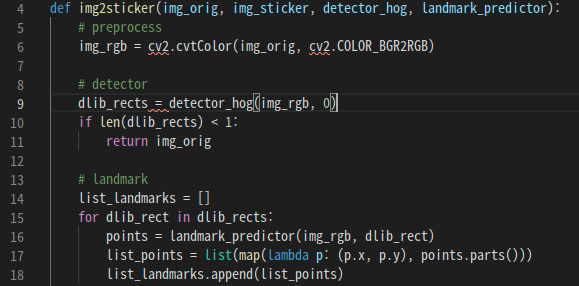

In [13]:
Image.open(image_path + "/Pictures/img(2).jpg")

### 4_2. detector_hog의 문제를 해결하기 위해 이미지 피라미드를 조절하여 성능을 향상시키는 간단한 방법이 있다.
* 이 방법을 활용하여 img2sticker 메소드를 간단히 고쳐보자.

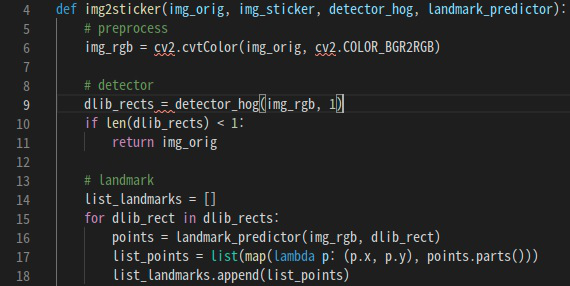

In [14]:
Image.open(image_path + "/Pictures/img(3).jpg")

### 4_3. 위에서 새롭게 시도한 방법의 문제점은 무엇인가?

In [5]:
# 속도가 너무 느리다.
# 원래 30ms에서 150ms으로 약 5배는 느려졌다.
# 그래서 동영상이 뚝뚝 끊기면서 움직이는 느낌을 받아서 부자연스럽고 답답하다.

### 4_4. 실행시간을 만족할 수 있는 방법을 찾아보자.

* hog 디텍터를 딥러닝 기반 디텍터로 변경할 수 있다.
* hog 학습 단계에서 다양한 각도에 대한 hog 특징을 모두 추출해서 일반화 하기 어렵기 때문에 딥러닝 기반 검출기의 성능이 훨씬 좋다.
* 딥러닝 기반 detection 방법을 조사한다. 아래 링크를 참고하면 도움이 될 것이다.
* https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/
* opencv 는 intel cpu 을 사용할 때 dnn 모듈이 가속화를 지원하고 있다.
* 따라서 mobilenet과 같은 작은 backbone 모델을 사용하고 ssd를 사용한다면 충분히 만족할 만한 시간과 성능을 얻을 수 있다.

### 4_5. 인원 수, 각도 등 각 문제에 대해서 1 - 4번을 반복해보자. (정해진 답은 없다)

* 자유롭게 설계해보자.
* 각도 문제에 대해서는 아래 방법을 적용해볼 수 있다.
* https://www.learnopencv.com/facial-landmark-detection/

## 프로젝트 (5) 칼만 필터 적용하기

### 5_1. 카메라 앞에서 가만히 있을 때 스티커의 움직임을 관찰한다.

* 가만히 있어도 스티커의 크리가 일정하게 유지되지 않고, 떨리는 것처럼 보이는 현상이 발생한다.

### 5_2. 이론 강의에서 배운 칼만 필터를 적용해서 스티커 움직임을 안정화시켜본다.

* 칼만 필터를 구현한 모듈인 kalman.py와 이를 이용하여 tracker를 구현한 kpkf.py를 이용하여 칼만필터를 적용한 webcam_sticker_kf.py를 함께 첨부했다.
* 실행해 보면 현재는 웹캠이 아니라 샘플 동영상에 칼만필터가 적용된 것을 확인하실 수 있다.
* 동영상 입력을 웹캠으로 바꾸면 우리가 만들고 있는 웹캠에도 동일하게 적용할 수 있다.
* webcam_sticker_kf.py를 참고하여 자신만의 webcam_sticker.py를 완성해보자.

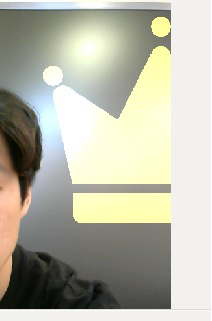

In [3]:
Image.open(image_path + "/Pictures/img(4).jpg")

In [4]:
# 실행시켜본 결과 왕관이 내 머리가 아닌 뒷 배경에 얼굴만하게 뜨는 것을 확인할 수 있었다.
# 다양한 배경에서 해봤는데 사무실이라 그런지 내 얼굴을 잘 찾지 못했다.
# 해당 코드는 이동 평균 필터를 사용하는 것 같은데 동영상은 잘 찾더니 왜 웹캠에서는 못 찾는것일까?

## 회고록

In [12]:
# 이번 프로젝트는 칼만 필터만 빼면 할만 했던 것 같다.
# 처음 프로젝트를 시작할 때 칼만 필터만 이해하면 된다는 퍼실님의 말이 이해가 되었다.
# 그렇다고 칼만 필터를 이해한 것은 아니다. 그래서 5번 프로젝트에서 왜 내 얼굴을 못 찾는지 해결하지 못했다.